# Sentiment Analysis: Twitter Message Review

### Naive Bayes Algorithm

**Collaborators:** JinWoo (Andrew) Ahn

This **Twitter Sentiment Analysis project** is focused on evaluating the messages and entities on a **real-world Twitter dataset,** an internet platform where users are open to share their personal opinions on matters that range from, but not limited to, politics, education, social, etc.

When companies and institutions seek to understand public opinion, they often perform **sentiment analysis** to recognize the thoughts about a certain topic.

The dataset contains of **three distinct classes: positive, negative, and netural.** The messages that are considered to be irrelevant are classified as neutral.

## Stage 1: Initial Analysis ##

In [44]:
# Load the tools that will be utilized
import numpy as np
import pandas as pd
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

### Loading in the Data ###

Before we apply any techniques or perform analysis on the dataset, it is important for us to accurately obtain the data in the correct format so that it does not cause troubles in the future.

The dataset is from [Kaggle](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis). It consists of a training set and validation set of which the **graularity of the data is a message to each entity.** Each row contains the following information: **Twitter ID, entity, class, and the actual message.**

In [45]:
# Import the zipfile tools and extract the files within the data.zip file
import zipfile
with zipfile.ZipFile('data.zip') as item:
    item.extractall()

In [46]:
# Assign the extracted files into a variable
data = pd.read_csv('twitter_training.csv')
#test_data = pd.read_csv('twitter_validation.csv')

# Change the column names of the dataframe so that it is easier to access
data.columns = ("ID", "entity", "class", "message")
#test_data.columns = ("ID", "entity", "class", "message")

data.head()

,ID,entity,class,message
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [47]:
# Convert the messages to lower case as a first step to processing the text
data['message'] = data['message'].str.lower()
#test_data['message'] = test_data['message'].str.lower()

data.head()

,ID,entity,class,message
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


### Fill Missing Values ###

Towards our final step in this section! Before we implement any techniques to the data, let us first check that there are no missing values (i.e. NaNs)

In [48]:
print('Missing Values:')
print(data.isnull().sum())
data = data.fillna('')
print('------------')
print('After Fixing:')
print(data.isnull().sum())

Missing Values:
ID           0
entity       0
class        0
message    686
dtype: int64
------------
After Fixing:
ID         0
entity     0
class      0
message    0
dtype: int64


### Counts

Before moving on to the Feature Engineering section, we will want to check the number of positive/negative reviews.

([<matplotlib.patches.Wedge at 0x1ead565bca0>,
 [Text(0.6413979879276777, 0.8936490480509263, 'negative'),
  Text(-1.0260534138311959, 0.3965027010820343, 'positive'),
  Text(-0.3173711731164097, -1.0532215049431501, 'neutral'),
  Text(0.9398132556351237, -0.571621417139447, 'irrelevant')])

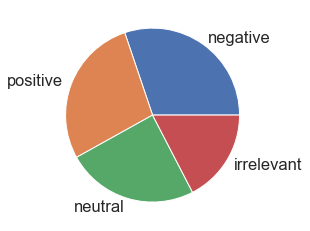

In [49]:
from matplotlib import pyplot as plt
label = ['negative','positive','neutral','irrelevant']
counts = data['class'].value_counts()
plt.pie(counts, labels=label)

## Stage 2: Data Manipulation

### Splitting Data

The first step in the process is to split the dataset into train/test and X and Y, where X represents the sentences and Y represents the class.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x = data['message']
y = data['class']

x, x_test, y, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [52]:
len(x), len(x_test)

(56010, 18671)

### Vectorization

Then, you will use the vectorizer to represent each sentence in the dataset into a vectorized array.

In [53]:
cv = CountVectorizer()

In [54]:
x = cv.fit_transform(x).toarray()
x_test = cv.transform(x_test).toarray()

## Step 3: Train/Testing Model

### Model Training

Now, we are going to use the training data to train the Bernoulli Naive Bayes model.

In [55]:
model = BernoulliNB()
model.fit(x, y)

BernoulliNB()

In [69]:
model_2 = MultinomialNB()
model_2.fit(x, y)

MultinomialNB()

### Model Validation

In [56]:
model.score(x_test, y_test)

0.7166193562208772

In [ ]:
# model.predict(cv.transform(['this is so hard']))

In [70]:
model_2.score(x_test, y_test)

0.7485405173798939

In [71]:
model_2.score(x, y)

0.7928584181396179

In [57]:
# model_2.predict(cv.transform(['this is so hard']))

## Step 4: Post-Test Analysis

In [67]:
# Isn't this weird? I trained on x and y, but the score is low
model.score(x, y)

0.7562399571505088

In [68]:
# out of all positive detected, percentage of actual positives
Precision = 1

# out of actual positive detected, percentage of actual positives
Recall = 1

F_score = 1